This is for testing SEI growth. We have noticed that:

In the case of "electron-migration limited" mechanism:
 1. The SEI fluctuates (decreases) for default parameters (i.e. without using any parameter sets) and the "Chen2020", "Ai2020", "Marquis2019", and "Mohtat2020" parameter sets.
 2. Get error when using "OKane2022" parameter set.

In the case of "ec reaction limited" mechanism:
The initial inner and outer SEI thicknesses must be greater than 3e-12.


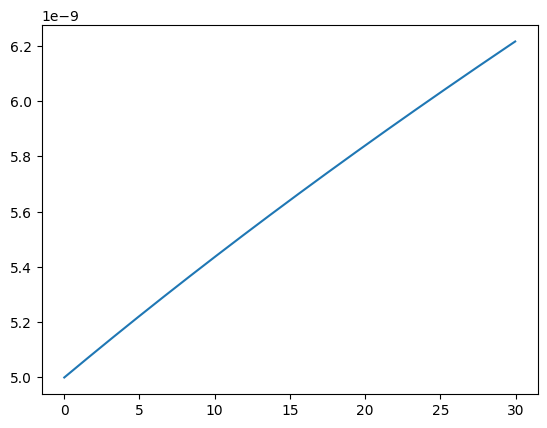

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
param = pybamm.ParameterValues("OKane2022")


# param['Initial inner SEI thickness [m]'] = 2.0e-12
# param['Initial outer SEI thickness [m]'] = 2.0e-12


cycle_no = 1
exp_CCCV = pybamm.Experiment(
    [("Charge at C/10 until 4.2 V",
        "Rest for 10 hours",
      "Discharge at C/10 until 2.5 V",
      )] * cycle_no
)

# Options of SEI Mechanism:
SEI_Mech = ["reaction limited", "solvent-diffusion limited",
            "interstitial-diffusion limited", "ec reaction limited", "electron-migration limited"]

# SEI Mechanism
index = 1
SPM_model = pybamm.lithium_ion.SPM(options={
    "SEI": SEI_Mech[index],
    "SEI porosity change": "true", })

sims_SPM = pybamm.Simulation(SPM_model, parameter_values=param,
                             experiment=exp_CCCV)
sol = sims_SPM.solve(initial_soc=0)

plt.plot(sol["Time [h]"].entries,
         sol['X-averaged total SEI thickness [m]'].entries)

In [2]:
plot = pybamm.QuickPlot(sims_SPM, time_unit='hours')

In [3]:
plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=29.97558585433252, step=0.2997558585433252),…

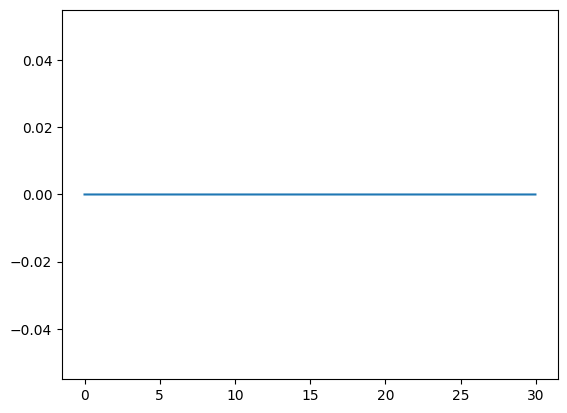

In [6]:
plt.plot(sol["Time [h]"].entries,
         sol["Contact overpotential [V]"].entries)